In [1]:
import numpy as np
np.random.seed(42)

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

(28, 28)


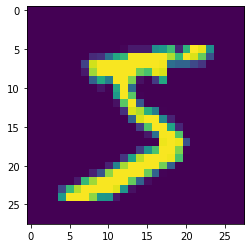

In [19]:
data_0 = mnist.data.values.reshape(-1,28,28)[:1,:,:].reshape(28,28)
print(data_0.shape)

plt.imshow(data_0)

In [14]:
mnist.target[0]
# type(mnist.target[0])

'5'

In [6]:
X,y = mnist.data,mnist.target

In [7]:
y = y.astype(int)

In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# Training model

In [10]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(tol=1e-3,random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict(data_0.reshape(1,784))

array([3])

(28, 28)


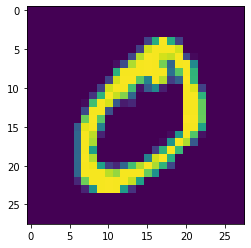

In [20]:
data_1 = mnist.data.values.reshape(-1,28,28)[1:2,:,:].reshape(28,28)
print(data_1.shape)

plt.imshow(data_1)

In [22]:
sgd_clf.predict(data_1.reshape(1,784))

array([0])

In [34]:
from sklearn.metrics import accuracy_score
pred_train=sgd_clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

accuracy_score on training data:  0.8807666666666667


In [36]:
from sklearn.metrics import accuracy_score
pred_test=sgd_clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on test data:  0.874


In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
forest_clf.predict(data_0.reshape(1,784))

array([5])

In [32]:
forest_clf.predict(data_1.reshape(1,784))

array([0])

In [35]:
from sklearn.metrics import accuracy_score
pred_train=forest_clf.predict(X_train)
print('accuracy_score on training data : ',accuracy_score(y_train,pred_train))

accuracy_score on training data :  1.0


In [37]:
from sklearn.metrics import accuracy_score
pred_test=forest_clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on test data:  0.9705


In [38]:
# save the model

import joblib
joblib.dump(forest_clf, 'model.pkl')

['model.pkl']

In [39]:
# save images to test from streamlit UI
from PIL import Image as im
image_0 = im.fromarray(data_0).convert('RGB')
image_0.save('image_0.JPG')
image_1 = im.fromarray(data_1).convert('RGB')
image_1.save('image_1.JPG')


# Binary classification

In [25]:
y_train5 = y_train==5
y_test5 = y_test==5

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(tol=1e-3,random_state=42)
sgd_clf.fit(X_train,y_train5)



SGDClassifier(random_state=42)

In [80]:
data_0 = mnist.data.values.reshape(-1,28,28)[:1,:,:].reshape(28,28)
data_0.shape

(28, 28)

In [82]:
sgd_clf.predict(data_0.reshape(1,784))

array([ True])

In [27]:
pred_train=sgd_clf.predict(X_train)

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

accuracy_score(y_train5,pred_train)

0.9522666666666667

In [29]:
precision_score(y_train5,pred_train)

0.6805026118876183

In [30]:
recall_score(y_train5,pred_train)

0.8891348459693783

In [31]:
pred_train=np.array([False]*60000)

In [32]:
accuracy_score(y_train5,pred_train)

0.90965

In [33]:
from sklearn.metrics import precision_recall_curve
y_scores2 = cross_val_predict(sgd_clf, X_train, y_train5, cv=3,
                             method="decision_function")
precisions,recalls,thresholds = precision_recall_curve(y_train5,y_scores2)

(-50000.0, 50000.0, 0.0, 1.0)

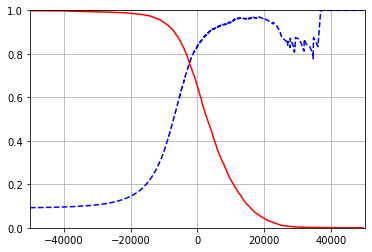

In [34]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"r-",label="Recall")
plt.grid(True)
plt.axis([-50000,50000,0,1])

In [35]:
threshold_90_pres = thresholds[np.argmax(precisions>=.90)]
threshold_90_pres

3370.019499143958

In [36]:
y_train_pred_90 = (y_scores2>=threshold_90_pres)
precision_score(y_train5,y_train_pred_90)

0.9000345901072293

In [37]:
recall_score(y_train5,y_train_pred_90)

0.4799852425751706

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train5,y_scores2)

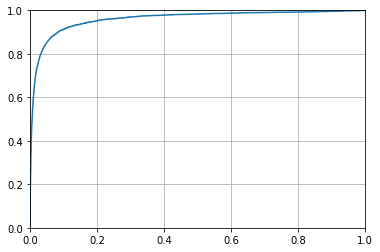

In [39]:
plt.plot(fpr,tpr)
plt.axis([0,1,0,1])
plt.grid(True)

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train5,y_scores2)

0.9604938554008616

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train5,cv=3,method='predict_proba')

In [42]:
y_scores_forest = y_probas_forest[:,1]

In [43]:
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train5,y_scores_forest)

(0.0, 1.0, 0.0, 1.0)

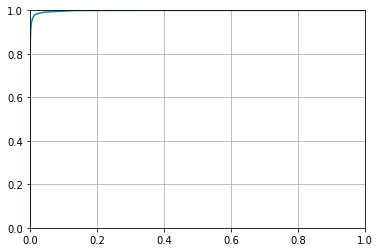

In [44]:
plt.plot(fpr_forest,tpr_forest)
plt.grid(True)
plt.axis([0,1,0,1])

In [45]:
roc_auc_score(y_train5,y_scores_forest)

0.9983436731328145

In [46]:
y_pred_for = y_probas_forest[:,1]>0.5

In [47]:
precision_score(y_train5,y_pred_for)

0.9905083315756169

In [48]:
recall_score(y_train5,y_pred_for)

0.8662608374838591

In [79]:
# save the model

import joblib
joblib.dump(sgd_clf, 'model.pkl')

['model.pkl']

In [ ]:
# save image
from PIL import Image as im
image_0 = im.fromarray(data_0).convert('RGB')
image_0.save('image_1.JPG')

from PIL import Image
img = Image.open('image_0.JPG')
np.array(img)[:,:,:1].reshape(784,)